In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Fraud_check.csv')

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA and Visualization

In [4]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
df.info

<bound method DataFrame.info of     Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..           

In [6]:
df.shape

(600, 6)

In [7]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

array([[<AxesSubplot:title={'center':'Taxable.Income'}>]], dtype=object)

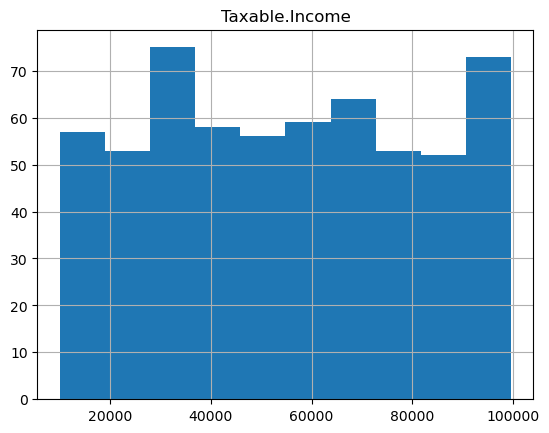

In [9]:
df.hist('Taxable.Income')

<IPython.core.display.Javascript object>

<AxesSubplot:>

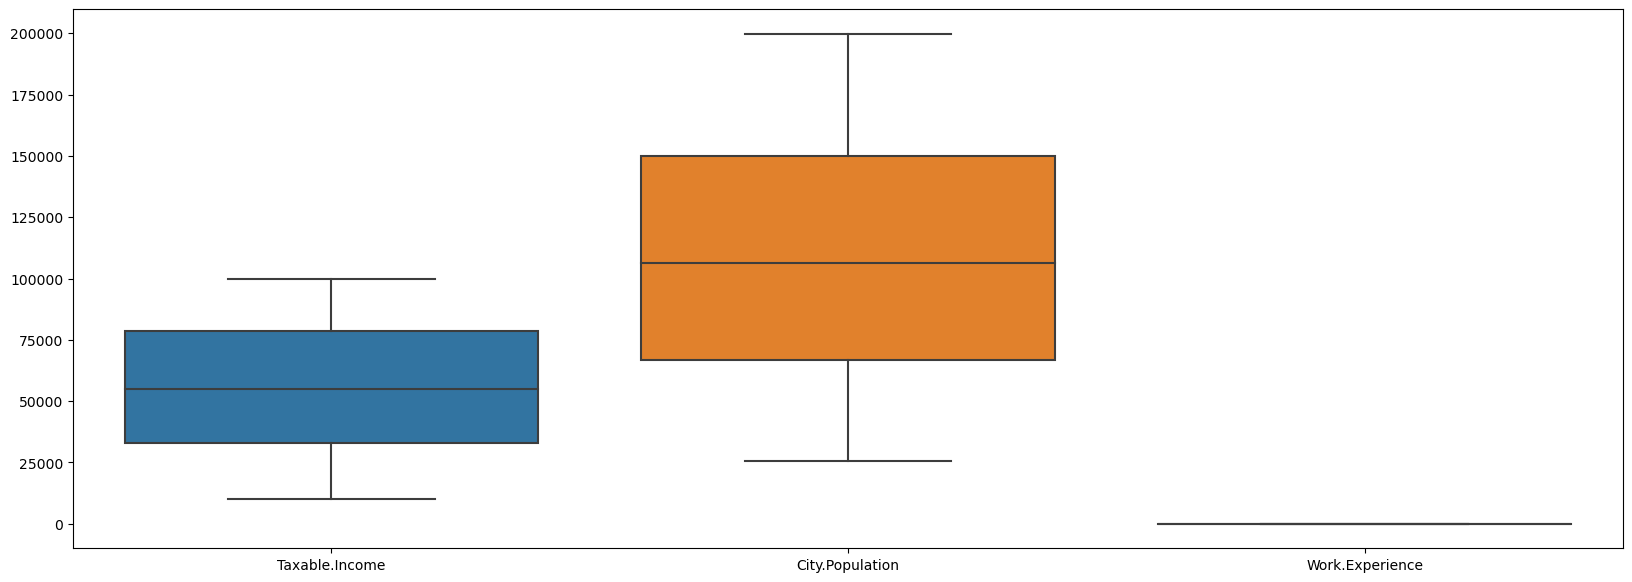

In [10]:
plt.figure(figsize=(20,7))
sns.boxplot(data = df)

In [11]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<IPython.core.display.Javascript object>

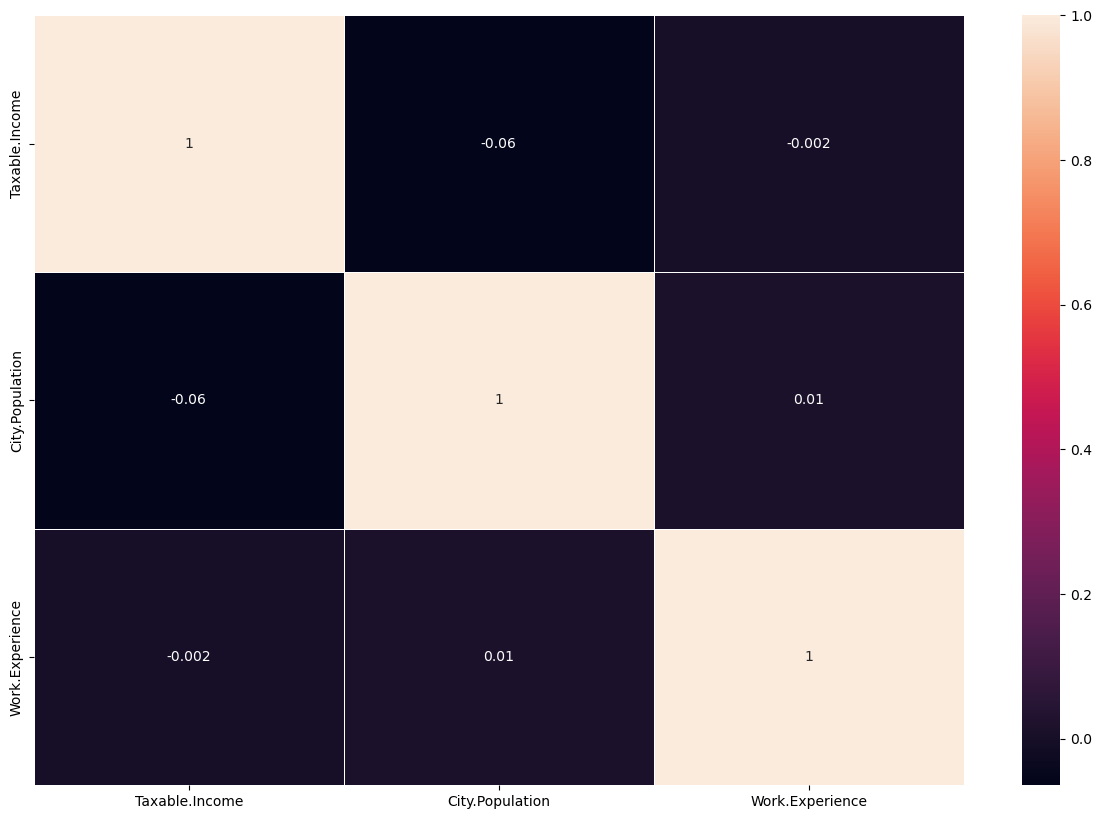

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g',linewidth=0.5);

# Data Encoding

In [14]:
label_encoder=preprocessing.LabelEncoder()

In [15]:
df['Undergrad']=label_encoder.fit_transform(df['Undergrad'])

In [16]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,68833,50047,10,YES
1,1,Divorced,33700,134075,18,YES
2,0,Married,36925,160205,30,YES
3,1,Single,50190,193264,15,YES
4,0,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,YES
596,1,Divorced,69967,55369,2,YES
597,0,Divorced,47334,154058,0,YES
598,1,Married,98592,180083,17,NO


In [17]:
df['Urban']=label_encoder.fit_transform(df['Urban'])

In [18]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,68833,50047,10,1
1,1,Divorced,33700,134075,18,1
2,0,Married,36925,160205,30,1
3,1,Single,50190,193264,15,1
4,0,Married,81002,27533,28,0
...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,1
596,1,Divorced,69967,55369,2,1
597,0,Divorced,47334,154058,0,1
598,1,Married,98592,180083,17,0


In [19]:
df['Marital.Status']=df['Marital.Status'].replace(['Single','Divorced','Married'],[0,2,1])

In [20]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,68833,50047,10,1
1,1,2,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,0,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,2,76340,39492,7,1
596,1,2,69967,55369,2,1
597,0,2,47334,154058,0,1
598,1,1,98592,180083,17,0


In [21]:
df['Taxable.Income']=df['Taxable.Income'].apply(lambda x:0 if x<30000 else 1)

In [22]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,1,50047,10,1
1,1,2,1,134075,18,1
2,0,1,1,160205,30,1
3,1,0,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,2,1,39492,7,1
596,1,2,1,55369,2,1
597,0,2,1,154058,0,1
598,1,1,1,180083,17,0


In [23]:
df['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [26]:
df=df.reindex(columns=['Taxable.Income','Undergrad', 'Marital.Status','City.Population','Work.Experience', 'Urban'])

In [25]:
df

,Taxable.Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,0,0,50047,10,1
1,1,1,2,134075,18,1
2,1,0,1,160205,30,1
3,1,1,0,193264,15,1
4,1,0,1,27533,28,0
...,...,...,...,...,...,...
595,1,1,2,39492,7,1
596,1,1,2,55369,2,1
597,1,0,2,154058,0,1
598,1,1,1,180083,17,0


In [27]:
df.corr()

,Taxable.Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
Taxable.Income,1.000000,-0.012523,0.006081,-0.012225,0.001972,-0.004830
Undergrad,-0.012523,1.000000,-0.042407,0.079579,-0.005362,-0.000267
Marital.Status,0.006081,-0.042407,1.000000,0.001564,0.002213,-0.064562
City.Population,-0.012225,0.079579,0.001564,1.000000,0.013135,-0.040098
Work.Experience,0.001972,-0.005362,0.002213,0.013135,1.000000,-0.094559
Urban,-0.004830,-0.000267,-0.064562,-0.040098,-0.094559,1.000000


<IPython.core.display.Javascript object>

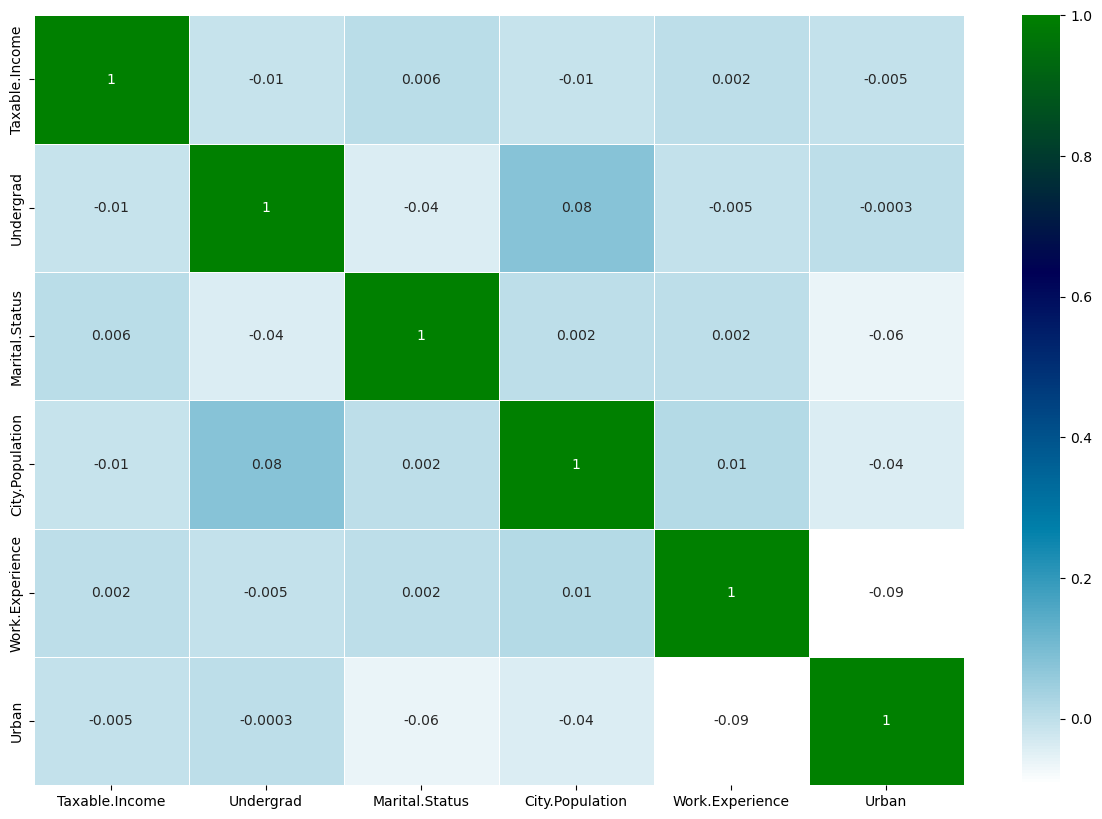

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="ocean_r",linewidth=0.5);

# Training and Testing

In [29]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [30]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,2,134075,18,1
2,0,1,160205,30,1
3,1,0,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,2,39492,7,1
596,1,2,55369,2,1
597,0,2,154058,0,1
598,1,1,180083,17,0


In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int64

In [32]:
x.shape

(600, 5)

In [33]:
y.shape

(600,)

In [34]:
y=pd.DataFrame(y)
y

,Taxable.Income
0,1
1,1
2,1
3,1
4,1
...,...
595,1
596,1
597,1
598,1


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [36]:
model=DecisionTreeClassifier()
parameters={"criterion":['gini',"entropy"],"max_features":[4,6,8],"max_depth":[4,6,8,10],"min_samples_split":[2,4,6,8]}
model.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.7083763266509434, 0.9772727272727273, 'X[3] <= 24.5\ngini = 0.322\nsamples = 480\nvalue = [97, 383]'),
 Text(0.5016583136792453, 0.9318181818181818, 'X[3] <= 17.5\ngini = 0.344\nsamples = 367\nvalue = [81, 286]'),
 Text(0.30697228773584906, 0.8863636363636364, 'X[2] <= 197925.0\ngini = 0.308\nsamples = 273\nvalue = [52, 221]'),
 Text(0.2975383254716981, 0.8409090909090909, 'X[2] <= 116133.0\ngini = 0.305\nsamples = 272\nvalue = [51, 221]'),
 Text(0.20961084905660377, 0.7954545454545454, 'X[2] <= 110065.5\ngini = 0.338\nsamples = 153\nvalue = [33, 120]'),
 Text(0.15978773584905662, 0.75, 'X[3] <= 13.5\ngini = 0.315\nsamples = 143\nvalue = [28, 115]'),
 Text(0.12264150943396226, 0.7045454545454546, 'X[2] <= 26849.0\ngini = 0.261\nsamples = 110\nvalue = [17, 93]'),
 Text(0.11320754716981132, 0.6590909090909091, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1320754716981132, 0.6590909090909091, 'X[2] <= 33045.5\ngini = 0.25\nsamples = 109\nvalue = [16, 93]'),
 Text(0.12264150

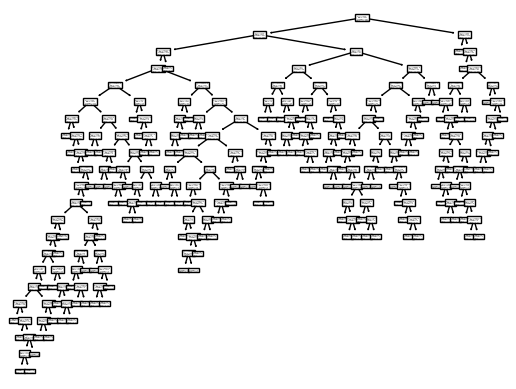

In [37]:
tree.plot_tree(model)

In [38]:
grid=GridSearchCV(model,parameters,cv=10)

In [39]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10], 'max_features': [4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]})

In [42]:
grid.best_score_

0.7875000000000001

In [43]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 4,
 'min_samples_split': 8}

## SMOTE Technique

In [46]:
from imblearn.combine import SMOTETomek

In [48]:
df

,Taxable.Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,0,0,50047,10,1
1,1,1,2,134075,18,1
2,1,0,1,160205,30,1
3,1,1,0,193264,15,1
4,1,0,1,27533,28,0
...,...,...,...,...,...,...
595,1,1,2,39492,7,1
596,1,1,2,55369,2,1
597,1,0,2,154058,0,1
598,1,1,1,180083,17,0


In [49]:
sm = SMOTETomek(sampling_strategy='minority',random_state=42)
X_re,y_re = sm.fit_resample(df.drop(['Taxable.Income'],axis=1),df['Taxable.Income'])

In [51]:
df1 = pd.concat([pd.DataFrame(y_re),pd.DataFrame(X_re)],axis =1)

In [52]:
df1['Taxable.Income'].value_counts()

1    365
0    365
Name: Taxable.Income, dtype: int64

Text(0, 0.5, 'frequency')

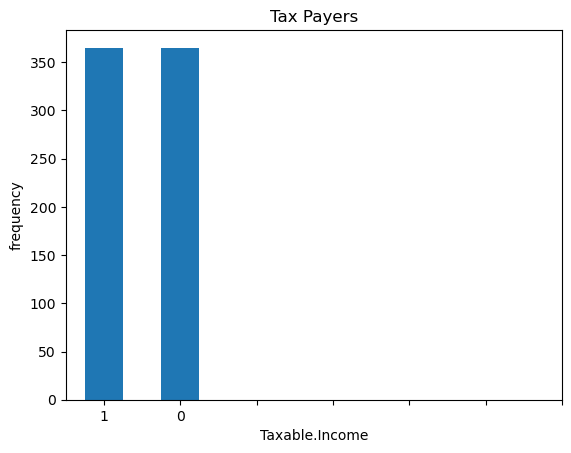

In [54]:
type_class = pd.value_counts(df1['Taxable.Income'],sort = True,ascending=True)
type_class.plot(kind ='bar',rot =0)
plt.title('Tax Payers')
plt.xticks(range(7))
plt.xlabel('Taxable.Income')
plt.ylabel('frequency')

In [55]:
array=df.values
x=array[:,1:]
y=array[:,0]

In [56]:
x

array([[     0,      0,  50047,     10,      1],
       [     1,      2, 134075,     18,      1],
       [     0,      1, 160205,     30,      1],
       ...,
       [     0,      2, 154058,      0,      1],
       [     1,      1, 180083,     17,      0],
       [     0,      2, 158137,     16,      0]], dtype=int64)

In [57]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=14)

In [59]:
model=DecisionTreeClassifier()
parameters={"criterion":['gini',"entropy"],"max_features":[4,6,8],"max_depth":[4,6,8,10],"min_samples_split":[2,4,6,8]}
model.fit(x_train,y_train)

DecisionTreeClassifier()

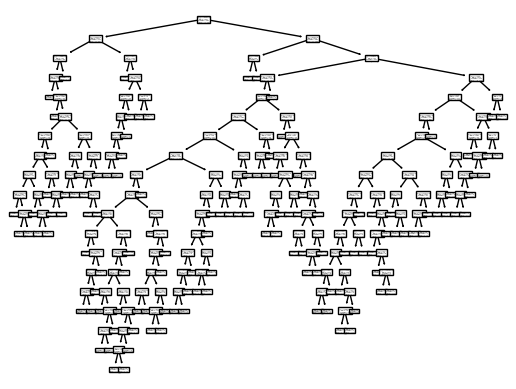

In [60]:
tree.plot_tree(model)
plt.show()

In [61]:
gd=GridSearchCV(model,parameters,cv=10)

In [62]:
gd.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10], 'max_features': [4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]})

In [63]:
gd.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 4,
 'min_samples_split': 8}

In [64]:
gd.best_score_

0.7854166666666668

# Final Model

In [66]:
final_model=DecisionTreeClassifier(criterion='entropy',min_samples_split=4,max_depth= 4,max_features=4,random_state=14)
final_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=4,
                       min_samples_split=4, random_state=14)

In [67]:
y_test_pred=final_model.predict(x_test)
y_test

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Cross Validation

In [68]:
score=cross_val_score(final_model,x_train,y_train,cv=10)
score.mean()

0.7833333333333333

In [69]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.79      1.00      0.88        95

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



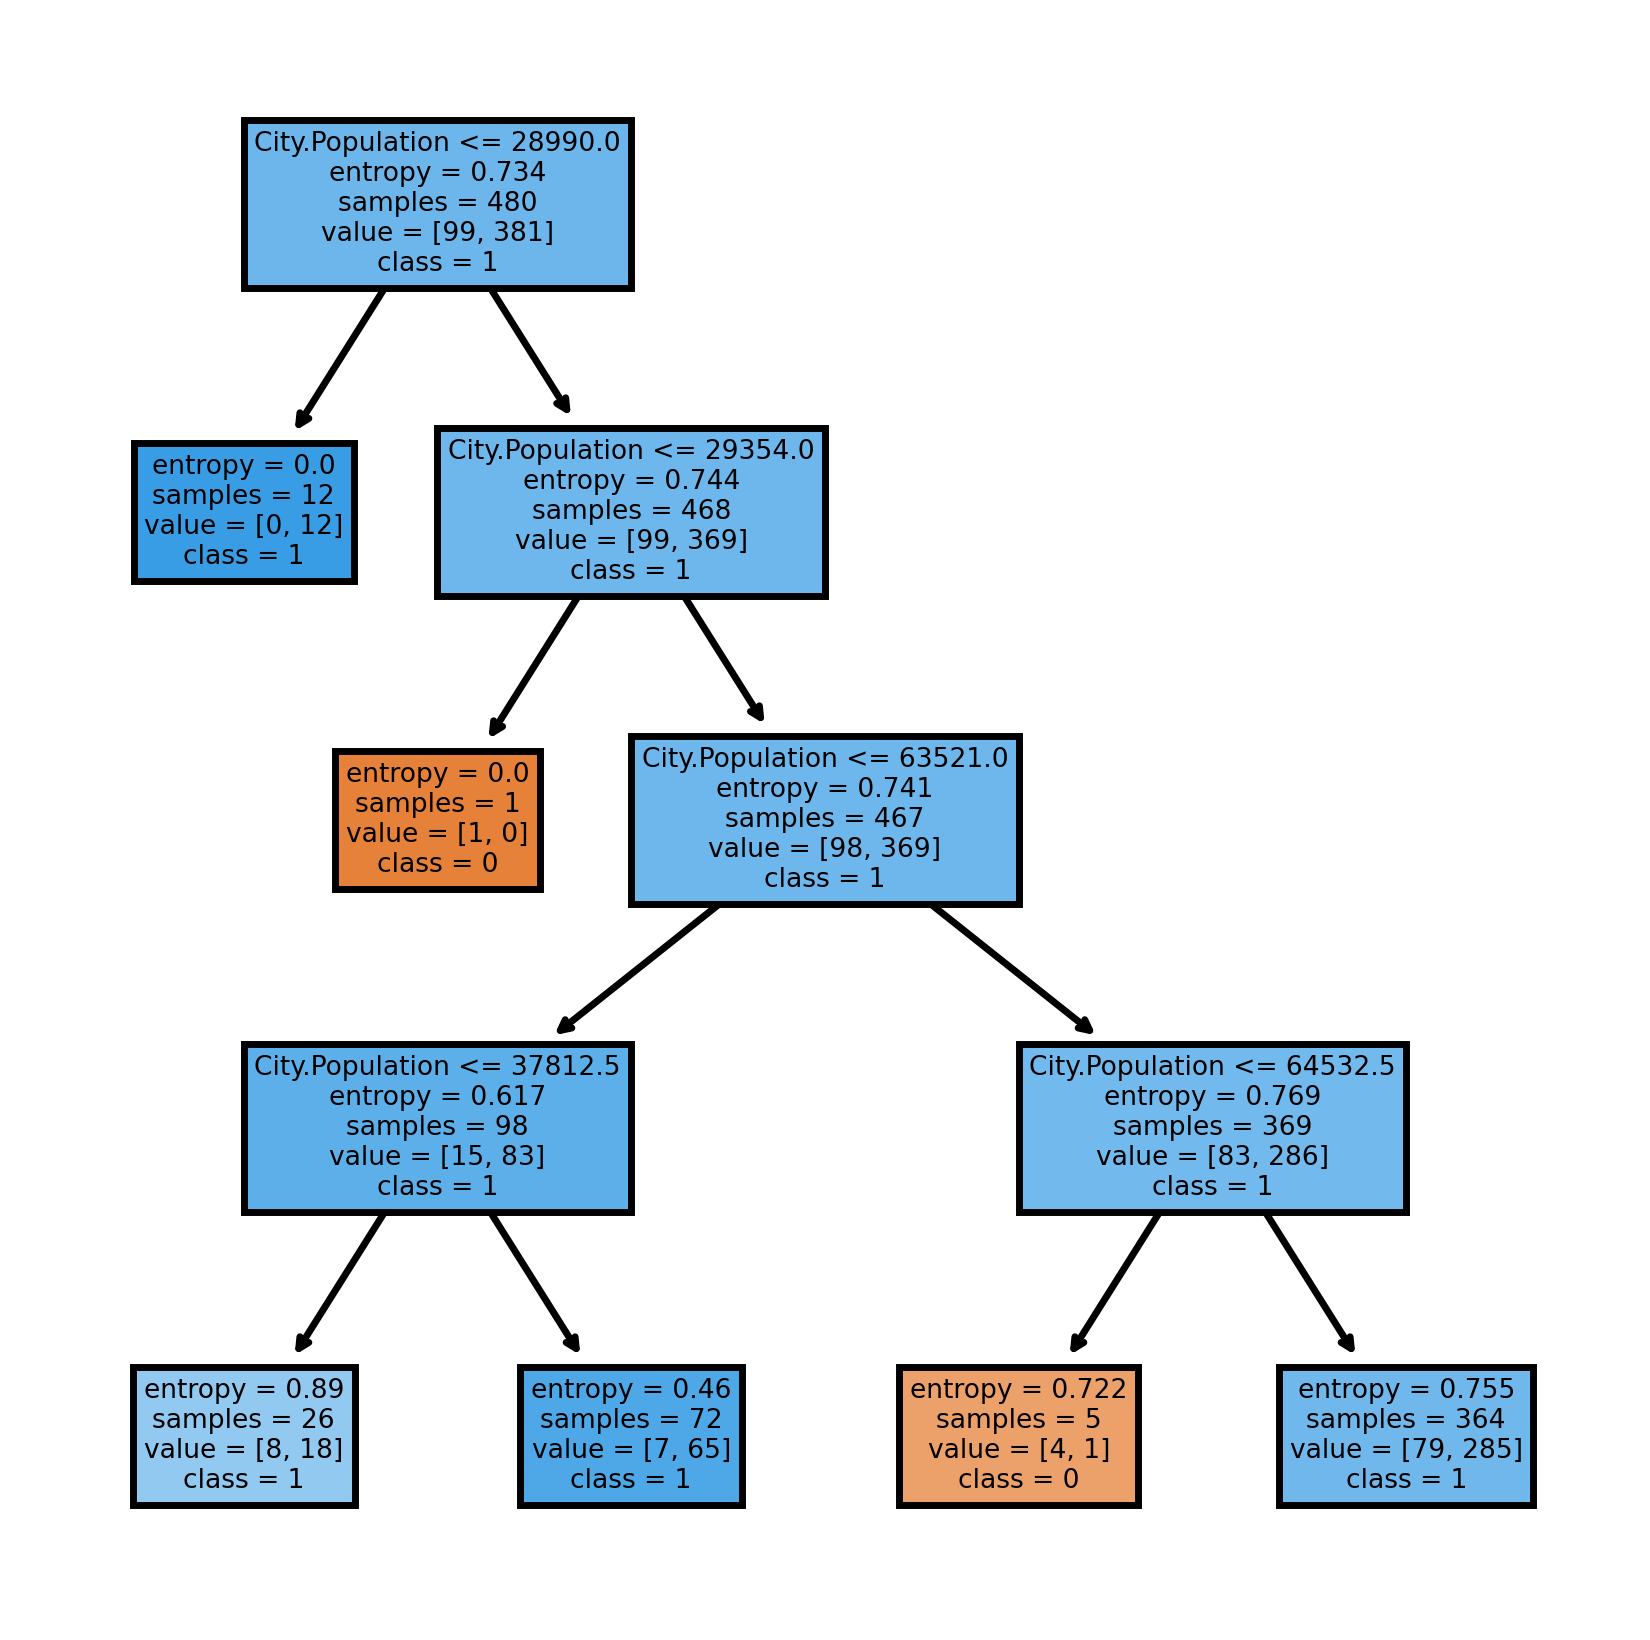

In [70]:
# Feature name
fn=['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban']
# Class Name
cn=['0','1']
fig,axes=plt.subplots(figsize=(4,4),dpi=500)
tree.plot_tree(final_model,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [ ]:
# Here SMOTETomek is not making any huge change thats why we go with our normal model.